# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")  
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [49,155,398]

# Create a DataFrame of the chosen samples
samples = data.iloc[indices]
print("Chosen samples of wholesale customers dataset:")
display(samples)

mean=data.mean()
mean=[round(m) for m in mean.tolist()]

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
49,4967,21412,28921,1798,13583,1163
155,1989,10690,19460,233,11577,2153
398,11442,1032,582,5390,74,247


Heatmap of samples


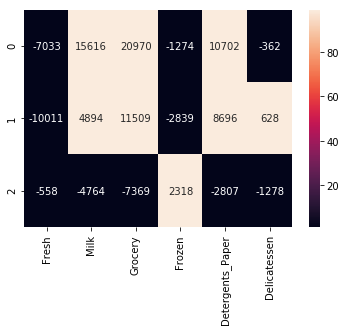

In [4]:
temp=[]
for i in range(len(samples)):
    val=samples.iloc[i].tolist()
    temp+=[[val-mean for (val,mean) in zip(val,mean)]]
temp=pd.DataFrame(temp)
temp.columns=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
print ("Heatmap of samples")
import seaborn as sns
sns.heatmap(temp, vmin=1, vmax=99, annot=True,fmt='d')


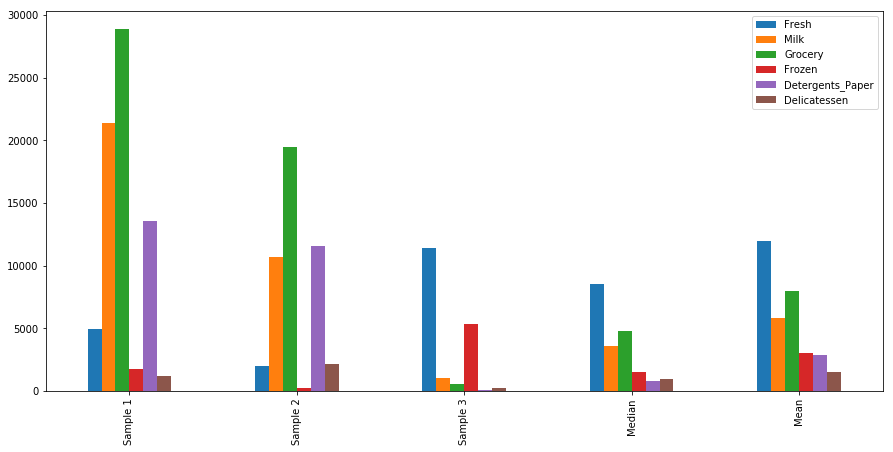

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

samples_for_plot = samples.copy()
samples_for_plot.loc[3] = data.median()
samples_for_plot.loc[4]= data.mean()

labels = ['Sample 1','Sample 2','Sample 3','Median','Mean']
samples_for_plot.plot(kind='bar',figsize=(15,7))
plt.xticks(range(5),labels)
plt.show()

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

*In heatmap ignore all black and focus num values with pink shades*.

>* sample 1 -index 49

This customer buy Milk, Grocerry and detergent paper more as its greater then both Mean and Median. So,this could be **Super market or Retail store or Groccery Store**.

>* Sample 2 -index 155

This customer is similar to Sample 1 but he buy one thing more that is Delicatessen which proves that he buy from **Retail store**.
( Milk, Grocerry, detergent paper and Delicatessen is more then Mean)

>* Sample 3 -index 398

Here Fresh and frozen foods are more then Mean and Median .this foods items are buyed from **Hotels or Restaurents** as to save time in home preparation for food.

******************************************************************************************************************************


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [7]:
from sklearn.model_selection  import train_test_split
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection  import cross_val_score
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import r2_score
from sklearn.grid_search import GridSearchCV

def check_feature(feature):
    new_data=data;
    all = data[feature]        
    new_data = new_data.drop( [feature], axis = 1 )

    X_train, X_test, y_train, y_test = train_test_split (new_data, all, test_size=0.25,  random_state=30)


    parameters = {'max_depth': list(range(1,6)),
                  'min_samples_leaf':[0.03,0.05,0.1,0.2]}
    cv_sets = ShuffleSplit(X_train.shape[0], n_iter = 10, test_size = 0.20, random_state = 30)
    regressor = DecisionTreeRegressor(random_state=30)
    scoring_fnc = make_scorer(r2_score)

    grid_obj = GridSearchCV(regressor, parameters, scoring = scoring_fnc, cv = cv_sets)
    grid_obj = grid_obj.fit(X_train, y_train)
    regressor = grid_obj.best_estimator_

    score = regressor.score(X_test, y_test)
    print ("\nThe R^2 score is for feature '{:10}'  is {:+.5f}".format(feature, score))
    print ("with Parameter 'max_depth' is {} for the optimal model.".format(regressor.get_params()['max_depth']))
    print ("with Parameter 'min_samples_leaf' is {} for the optimal model.".format(regressor.get_params()['min_samples_leaf']))

for feature in data.columns.values:
    check_feature(feature)


The R^2 score is for feature 'Fresh     '  is +0.06791
with Parameter 'max_depth' is 2 for the optimal model.
with Parameter 'min_samples_leaf' is 0.1 for the optimal model.

The R^2 score is for feature 'Milk      '  is +0.56873
with Parameter 'max_depth' is 5 for the optimal model.
with Parameter 'min_samples_leaf' is 0.05 for the optimal model.

The R^2 score is for feature 'Grocery   '  is +0.73390
with Parameter 'max_depth' is 4 for the optimal model.
with Parameter 'min_samples_leaf' is 0.03 for the optimal model.

The R^2 score is for feature 'Frozen    '  is +0.06647
with Parameter 'max_depth' is 3 for the optimal model.
with Parameter 'min_samples_leaf' is 0.2 for the optimal model.

The R^2 score is for feature 'Detergents_Paper'  is +0.75962
with Parameter 'max_depth' is 4 for the optimal model.
with Parameter 'min_samples_leaf' is 0.03 for the optimal model.

The R^2 score is for feature 'Delicatessen'  is +0.11702
with Parameter 'max_depth' is 3 for the optimal model.
wit

### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**
R2 score for Fresh and Frozen is 0.06791 and 0.06647 respectively which i attempt to predict . 

Yes, this feature is neccessary for identifying customer habits as if this features get removed then it is possible loss of information in considering relevance.

we seen that Detergent paper , grocery and milk are having *High R2* score which shows that if any one of this is buyed then customer will buy others product too which is difficult for us to seprate customer behaviour when clubing different products, if they buy other product too its hard to club them.

To understand better, see below with correlation matrix heatmap .

******************************************************************************************************************************


### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

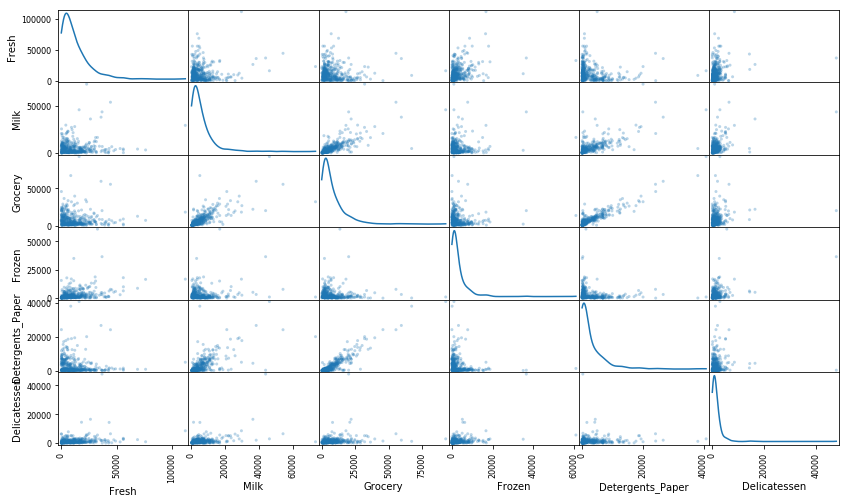

In [8]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html) (the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

Heatmap of correlation  with pearson method


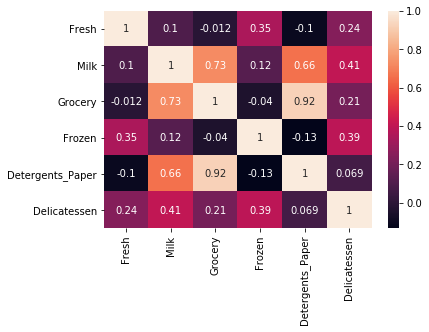

In [9]:
print ("Heatmap of correlation  with pearson method")
import seaborn as sns
sns.heatmap(data.corr(), annot=True)

In [10]:
print("MEAN of correlation matrix along column")
pd.DataFrame(data.corr().mean()).transpose()

MEAN of correlation matrix along column


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.262879,0.503504,0.467738,0.281518,0.403712,0.386132


In [11]:
print("MEDIAN of correlation matrix along column")
pd.DataFrame(data.corr().median()).transpose()

MEDIAN of correlation matrix along column


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.1726,0.534092,0.466916,0.234938,0.365553,0.317819


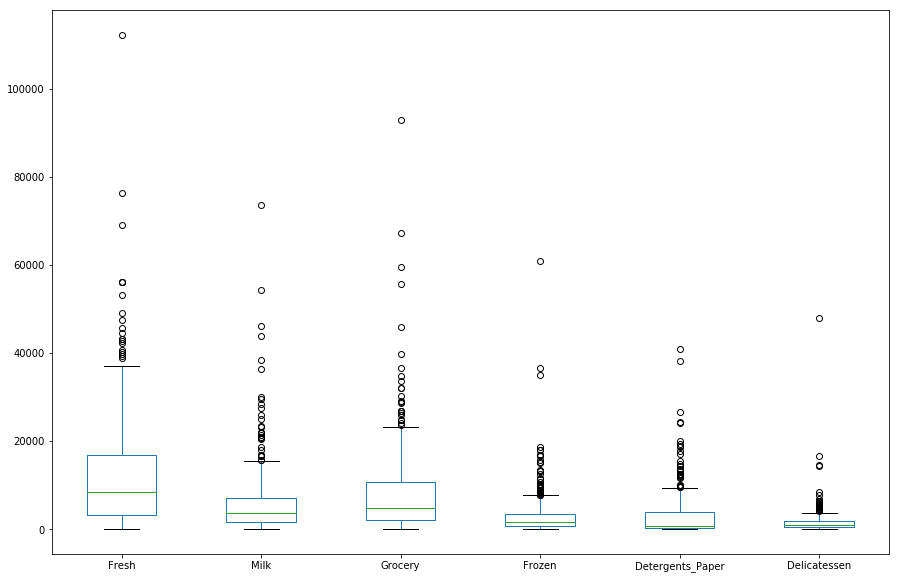

In [12]:
data.plot(kind='box',figsize=(15,10)) 

**Answer:**

>*According to R2 score and correlation matrix we seen that low R2 score has low correlation value which shows that correlation is somewhat directly proportional to R2 score.*

--
>* Are there any pairs of features which exhibit some degree of correlation? 

I. Grocery and Detergents_paper.

II. Grocery and Milk. 

III. Milk and Detergents_paper



>* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 

*Yes*, this confirm my suspicious about relevance of feature with others.

*Fresh and Frozen* are having low R2 and correlation value with other product making less relevance => if customer buy Fresh or Frozen then he will has *less* possibility of buying other prodeuct making easier to segment customers when we clubing them with items they buy.

*Milk, Grocery and Detergents_Paper* are having high R2 and correlation value with other product making high relevance=> if customer buy any of this product then he has *high* possiblity of buying other product making harder to segment customers as more product to club.

>* How is the data for those features distributed?

My ans is based on this link-

https://www.everythingmaths.co.za/read/maths/grade-11/statistics/11-statistics-05

below image is the summary of diff categories with box plot

In [13]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "distrib_summary.png", width=500, height=500)

The customer data are not normally distributed due to the presence of many outliers.
This customer data is **Right Skewed** due to following reasons-

1) The mean is typically more than the median.

2) The tail of distribution is less on left side than on right side.

3) From the Out[12] box plot we can see that Median(2nd quartile) is close to First Quartile then Third Quartile.

******************************************************************************************************************************


## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. 
*Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.*

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

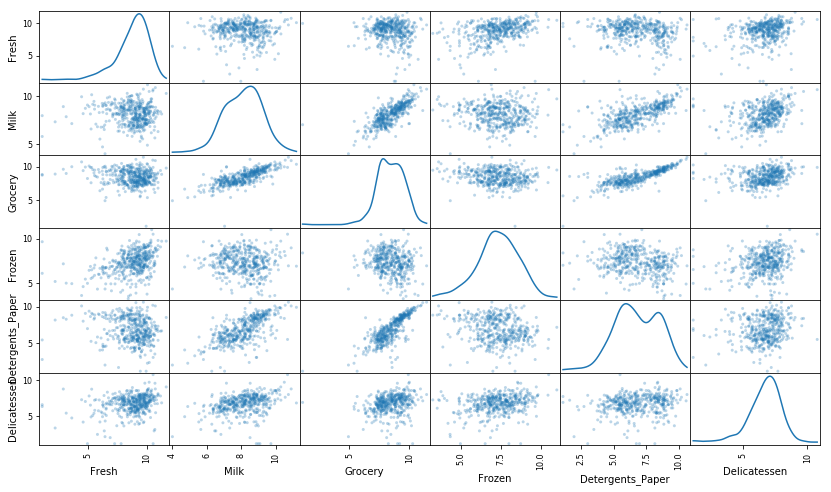

In [14]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

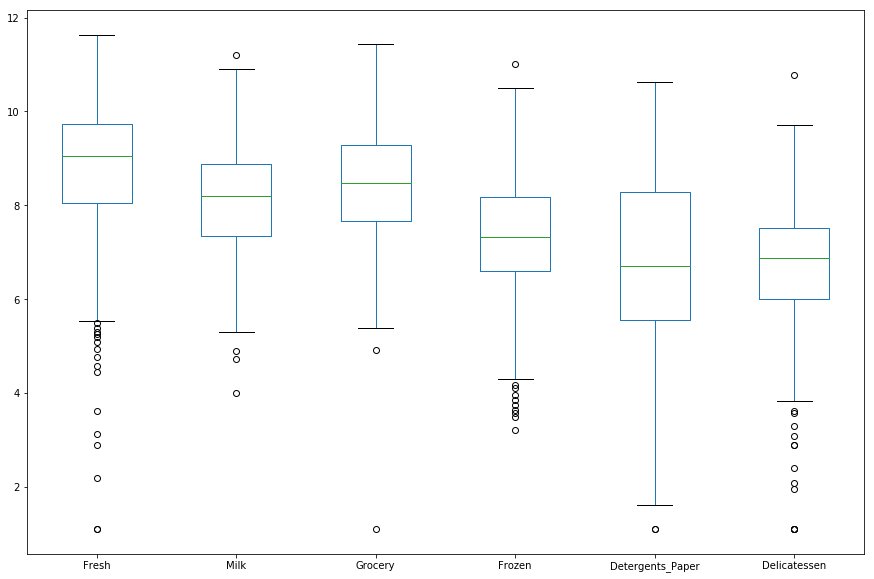

In [15]:
log_data.plot(kind='box',figsize=(15,10)) 

**However, there are cases where the log-transform doesn't get us as close to normal as we'd like. Another option in that case is the BoxCox transformation.
We can apply it here like so-**

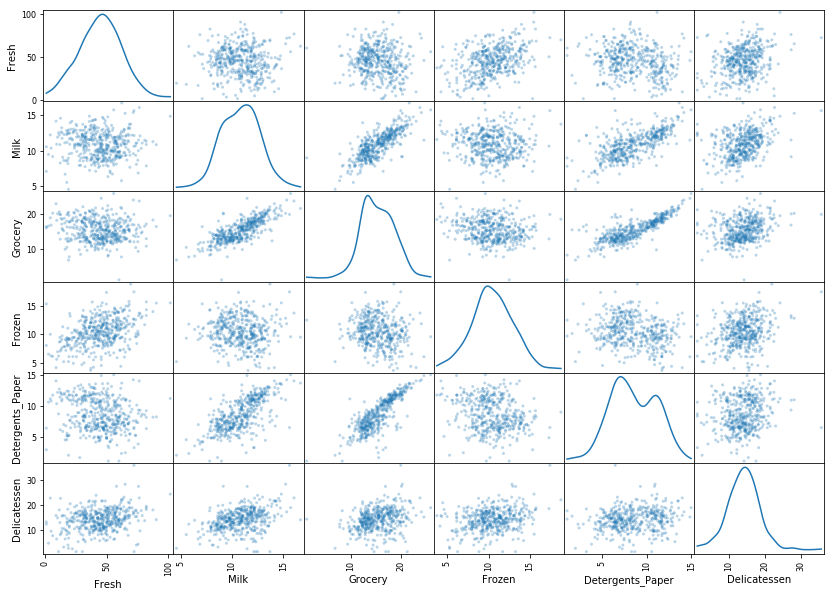

In [16]:
from scipy.stats import boxcox
boxcox_data = data.apply(lambda x: boxcox(x)[0])
pd.plotting.scatter_matrix(boxcox_data, alpha = 0.3, figsize = (14,10), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal(normal distribution). For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [17]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
49,8.510571,9.971707,10.272323,7.494430,9.516574,7.058758
155,7.595387,9.277064,9.876116,5.451038,9.356776,7.674617
398,9.345046,6.939254,6.366470,8.592301,4.304065,5.509388


In [18]:
print("R2 score of each features AFTER APPLING LOG")
for feature in log_data.columns.values:
    check_feature(feature)

R2 score of each features AFTER APPLING LOG

The R^2 score is for feature 'Fresh     '  is +0.06791
with Parameter 'max_depth' is 2 for the optimal model.
with Parameter 'min_samples_leaf' is 0.1 for the optimal model.

The R^2 score is for feature 'Milk      '  is +0.56873
with Parameter 'max_depth' is 5 for the optimal model.
with Parameter 'min_samples_leaf' is 0.05 for the optimal model.

The R^2 score is for feature 'Grocery   '  is +0.73390
with Parameter 'max_depth' is 4 for the optimal model.
with Parameter 'min_samples_leaf' is 0.03 for the optimal model.

The R^2 score is for feature 'Frozen    '  is +0.06647
with Parameter 'max_depth' is 3 for the optimal model.
with Parameter 'min_samples_leaf' is 0.2 for the optimal model.

The R^2 score is for feature 'Detergents_Paper'  is +0.75962
with Parameter 'max_depth' is 4 for the optimal model.
with Parameter 'min_samples_leaf' is 0.03 for the optimal model.

The R^2 score is for feature 'Delicatessen'  is +0.11702
with Parameter

Heatmap of correlation with pearson method AFTER LOG


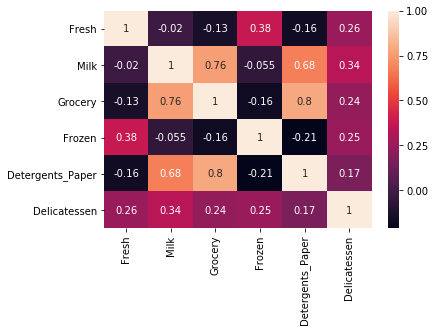

In [19]:
print ("Heatmap of correlation with pearson method AFTER LOG")

sns.heatmap(log_data.corr(), annot=True)

>* For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

COMPARING with previous data and after log data

according to previous data their is a question asked-

>* Are there any pairs of features which exhibit some degree of correlation? 

I. Grocery and Detergents_paper.(0.92)

II. Grocery and Milk.(0.73)

III. Milk and Detergents_paper.(0.66)

>* Now, after applying log whether that correlation is still present (and whether it is now stronger or weaker than before)?

I. Grocery and Detergents_paper.(0.8)-weaker

II. Grocery and Milk.(0.76)-stronger

III. Milk and Detergents_paper.(0.68)-stronger

as we have seen that overall change is not that much affected the result is similar to previous one only.
******************************************************************************************************************************

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [20]:
# For each feature find the data points with extreme high or low values
ALL_outliers_with_repetition=[]
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    ALL_outliers_with_repetition =ALL_outliers_with_repetition+ list(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index)
# OPTIONAL: Select the indices for data points you wish to remove
#lets remove the duplicate outliers
ALL_outliers_without_repetition=set(ALL_outliers_with_repetition)
duplicate_outliers=[i for i in ALL_outliers_without_repetition if ALL_outliers_with_repetition.count(i)>1]

outliers  = duplicate_outliers

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [21]:
duplicate_outliers

[128, 154, 65, 66, 75]

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

>* Are there any data points considered outliers for more than one feature based on the definition above? 

Duplicate outliers that are repeated as outliers in more then one features are [128, 154, 65, 66, 75]

>* Should these data points be removed from the dataset? 

Yes, this datapoints that are repeated outliers in many feature should be removed.

>* If any data points were added to the `outliers` list to be removed, explain why.

All these [128, 154, 65, 66, 75]
outliers that are outside the acceptable range (1.5 * IQR) ,of turkey method, should be eliminated to prevent 
from bringing skewness in data result. Also,These data points were chosen to be removed because they were considered extreme outliers.

Outliers as a problem to kmeans-
Imagine we have a dataset containing 2 clusters that are nice, Gaussian point clouds. We want to find 2 clusters in the data using K-means. However, say there's also a single outlier, located very far from either of the 'true' clusters. Maybe millions of times further away from any other point than any other points are to each other. If we chose the centroids to be the centers of the true clusters (the best 'representative' configuration), the value of the loss function would be very high. The loss function is the sum of squared distances from each point to its assigned cluster centroid. It would be high because the outlier is so far from the nearest centroid. Therefore, K-means would reduce the loss function by choosing the outlier itself to be one of centroids, and placing the other centroid somewhere in the middle of the remaining data. This configuration is clearly not representative of the the underlying distribution, but a pathological situation caused by the presence of a single outlier.

Outlier as a problem to PCA- https://repository.uantwerpen.be/docman/irua/bc9f26/1234.pdf
We know that PCA is eigen decomposition of Covarience matrix X transpose time X. Both the variance and the variance–covariance matrix are known to be sensitive to outliers. Hence, the same conclusion holds for PCA as a whole: it is a nonrobust method. A single bad outlier may cause that principal components are distorted so as to fit the outlier well, leading to bad interpretation of the results. By above reasons it is proved that we need to remove outliers from customer data.
********************************************************************************************************************************

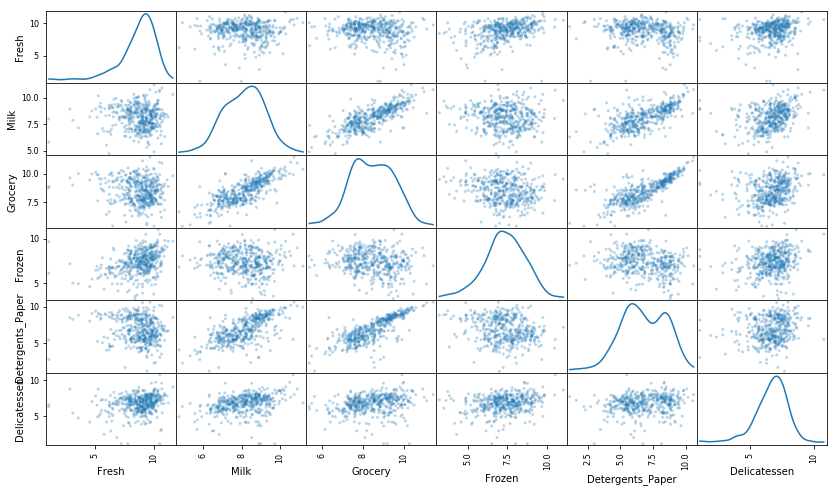

In [22]:
#after removing outlier
pd.plotting.scatter_matrix(good_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

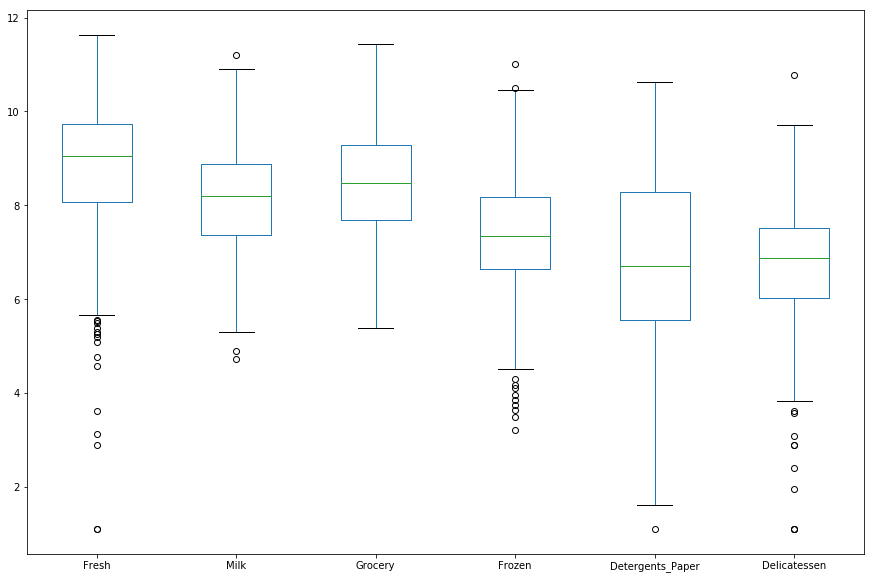

In [23]:
good_data.plot(kind='box',figsize=(15,10)) 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

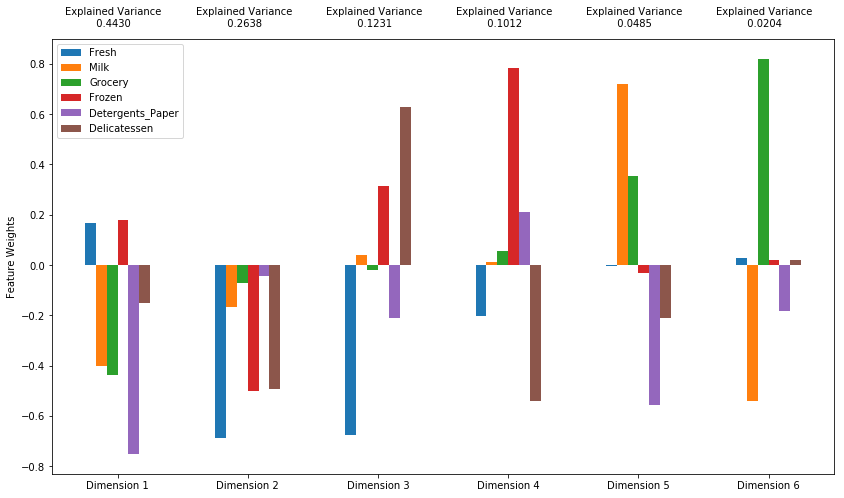

In [25]:
from sklearn.decomposition import PCA
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
n_components=6
pca = PCA(n_components=n_components, whiten=True, svd_solver='randomized')
pca.fit(good_data)
# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [26]:
# DataFrame of results
display(pca_results)


,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4430,0.1675,-0.4014,-0.4381,0.1782,-0.7514,-0.1499
Dimension 2,0.2638,-0.6859,-0.1672,-0.0707,-0.5005,-0.0424,-0.4941
Dimension 3,0.1231,-0.6774,0.0402,-0.0195,0.3150,-0.2117,0.6286
Dimension 4,0.1012,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423
Dimension 5,0.0485,-0.0026,0.7192,0.3554,-0.0331,-0.5582,-0.2092
Dimension 6,0.0204,0.0292,-0.5402,0.8205,0.0205,-0.1824,0.0197


In [27]:
# Cumulative explained variance should add to 1
display(pca_results['Explained Variance'].cumsum())

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**
>* How much variance in the data is explained* **in total** *by the first and second principal component? 

We seen that first and second principal compont(respective dimension 1 and 2) are having high varience compare to others.
Total varince explained by _fRIST principal component_ is 44.30% .
Total varince explained by _SECOND principal component_ is 26.38% .

>* How much variance in the data is explained by the first four principal components? 

It is 93.11%.

>* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

  * The **First principal component** seems to capture the information mainly contained in Grocery, Milk and Detergents_Paper features, these three features were also found to be the most correlated, suggesting that they could be reduced to smaller dimension without too much loss of information. This dimension is best categorized by customer spending on _retail goods or grocery store or retail store._

  
  * The **Second principal component** seems to be capturing the information contained in the remaining features Fresh, Frozen and  Delicatessen, this would make the component a _suitable orthogonal to the first component_.This dimension is best categorized by customer spending on _restaurants(owner) or deli food market._
  
  
  * The **Third principal component** seems to capture the positive impact of Delicatessena and frozen on the customer sales and large negative decrease of the Fresh feature,unlike 2nd prin. comp. this suggests that the component tries to account for the lack of correlation between this three features.
  This dimension is best categorized by customer spending on _Delicatessen ready to eat products_ .
  
  
  * The **Fourth principal component** component seems to capture the positive impact on frozen with a significant negative decrease on delicatessen. This dimension is best categorized by customer spending on _frozen products._
  


### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [28]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.7082,-0.3896,-0.0717,0.6692,0.5268,-0.0028
1,-1.7256,0.5201,0.2636,-1.1127,-0.3376,0.0470
2,1.7675,0.0043,-0.1921,0.8490,-0.0034,-1.3132


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [29]:
# TODO: Apply PCA by fitting the good data with only two dimensions
n_components=2
pca_2 = PCA(n_components=n_components,whiten=True,svd_solver='randomized')
pca_2.fit(good_data)
# TODO: Transform the good data using the PCA fit above
reduced_data = pca_2.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca_2.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [30]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.7082,-0.3896
1,-1.7256,0.5201
2,1.7675,0.0043


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

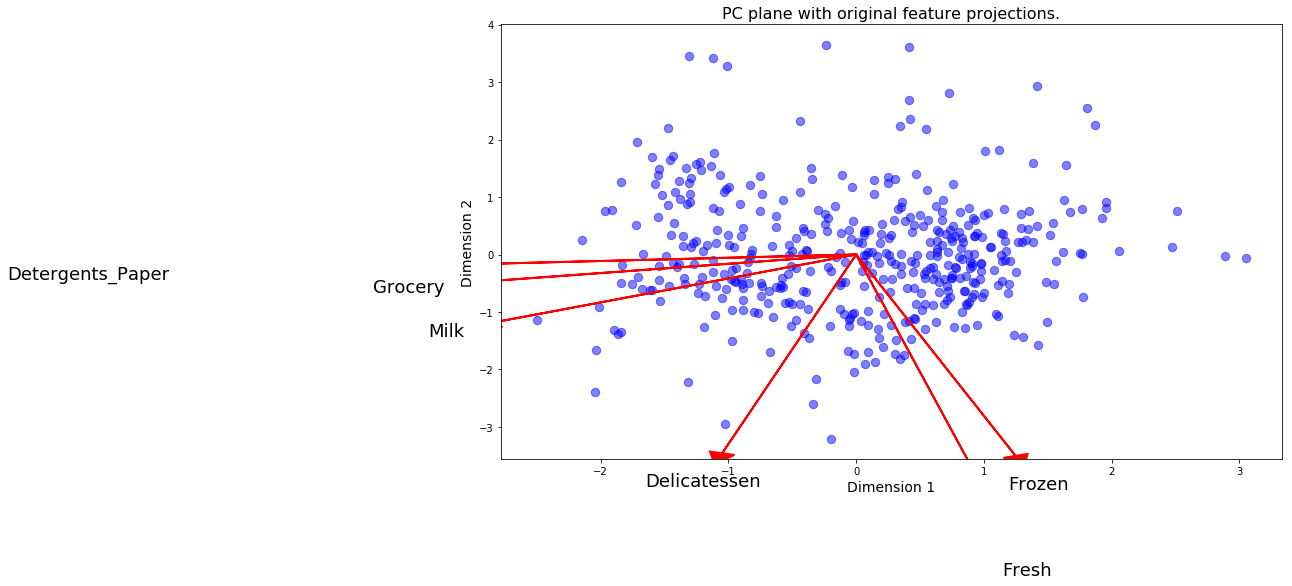

In [31]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca_2)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the _lower left corner_ of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories.

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

>* From the biplot, which of the original features are most strongly correlated with the first component?

Milk, grocery and detergent paper are strongly correlated in 1st component as shown above in PCA result plot.

-along X-axis

>* What about those that are associated with the second component? 

Delicateson, Fresh and Frozen are higly correlated in 2nd component as shown above in PCA result plot.

-along Y-axis

>*  Do these observations agree with the pca_results plot you obtained earlier?

YES, they are agreed :-)

One more thing to be noted that - 
>this components are based on r2 score and corelation matrix we plotted at the beginning

_As we can see that higly correlated and high R2 SCORE features like Milk, grocerry and detergent paper are clubed in one component i.e 1st component and low R2 score featues like Frsh and frozen are clubed under 2nd component._

*******************************************************************************************************************************

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**
>* What are the advantages to using a K-Means clustering algorithm? 

K-means are good when we know clusters beforehand.

If organization of datapoints are in circular or spherical like shape then it is easier to find centroid by kmeans.

It is a hill climbing algorithm, depends on local minimum where you put intial clusters.

>Minimizes the aggregate intra cluster distance

-total squared distance from centroid point to its cluster points and its same as varience if euclidian distance is applied.

>Converges to local minimum not global minimum

-differnet starting position ->differnt results 
-param- n_iter- run several times with random starting points then at final it picks best that has smallest aggregate distance.

>In general, K-Means offers better performance if we care about

Scaleability

Simplicity


>* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 

_Soft clustering algorithm_ where every point of our dataset will belong to every cluster with having different membership value for each cluster.

cluster shape flexibility like a cluster can contain another cluster inside it (0.43 -udacity GMM example & app)

It is the fastest algorithm for learning mixture models (below code i have shown time to train comparison) 

Additionally, they both use cluster centers to model the data; however, k-means clustering tends to find clusters of comparable spatial extent, while the expectation-maximization mechanism allows clusters to have different shapes.

>In terms of performance GMM provides more then Kmeans in terms of- 

Flexibility

Robustness

The fact that K-Means assumes that all clusters is globular is a pretty enormous assumption, and is always something we have to take into consideration. GMM is far less rigid in this - it allows these spheres to be stretched and compressed.

>* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

https://sandipanweb.wordpress.com/2017/03/19/hard-soft-clustering-with-k-means-weighted-k-means-and-gmm-em/
I decided to go with Gausian Mixture model as due to Feature correlation and general domain knowledge/intuition would indicate that these data points,will result in overlapping and possible non-spherical clusters such that soft clustering will be done.

**************************************************************************************************

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [32]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#lets take different number of clusters centers and test on them to pick the best
n_clusters=[clus for clus in range(2,11,2)]
print("number of clusters ",n_clusters)

number of clusters  [2, 4, 6, 8, 10]


>* **KMEANS** testing

In [33]:
# Loop through clusters
for n_clus in n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_clus,random_state=10).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='euclidean')
    print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clus, score))

For n_clusters = 2. The average silhouette_score is : 0.3750662180264646
For n_clusters = 4. The average silhouette_score is : 0.36591547612873226
For n_clusters = 6. The average silhouette_score is : 0.35670000781062683
For n_clusters = 8. The average silhouette_score is : 0.34909249664508296
For n_clusters = 10. The average silhouette_score is : 0.3523381489514546


>* **GMM** testing

In [34]:

# Loop through clusters
for n_clusters in n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=n_clusters,random_state=10).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='mahalanobis')
    print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.3761714715061737
For n_clusters = 4. The average silhouette_score is : 0.3400653266581288
For n_clusters = 6. The average silhouette_score is : 0.3048605368081312
For n_clusters = 8. The average silhouette_score is : 0.3483739097106429
For n_clusters = 10. The average silhouette_score is : 0.30384536119178807


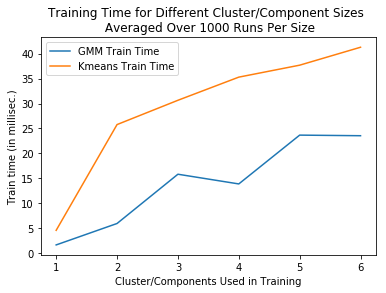

In [35]:
import time
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

n = 1000
k = 2

kmeans_train_times = []
for k in range(1, 7):
    cum_time = 0.
    for i in range(n):
        start = time.time()
        KMeans(n_clusters=k).fit(reduced_data)
        cum_time += (time.time() - start)

    train_time = cum_time / n
    kmeans_train_times.append([k, train_time])

km_df = pd.DataFrame(kmeans_train_times, columns=['KM_Clusters', 'KM_Time'])

gmm_train_times = []
for k in range(1, 7):
    cum_time = 0.
    for i in range(n):
        start = time.time()
        GaussianMixture(n_components=k).fit(reduced_data)
        cum_time += (time.time() - start)

    train_time = cum_time / n
    gmm_train_times.append([k, train_time])

gmm_df = pd.DataFrame(gmm_train_times, columns=['GMM_Components', 'GMM_Time'])
times_df = km_df.join(gmm_df)

plt.plot(times_df.GMM_Components, times_df.GMM_Time * 1000., label='GMM Train Time')
plt.plot(times_df.GMM_Components, times_df.KM_Time * 1000., label='Kmeans Train Time')
plt.legend(loc='best')
plt.ylabel('Train time (in millisec.)')
plt.xlabel('Cluster/Components Used in Training')
plt.title('Training Time for Different Cluster/Component Sizes \n Averaged Over {} Runs Per Size'.format(n))
plt.show()


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

* Report the silhouette score for several cluster numbers you tried. 

>For **Kmeans**

For n_clusters = 2. The average silhouette_score is : 0.37506621802646434

For n_clusters = 4. The average silhouette_score is : 0.3659154761287324

For n_clusters = 6. The average silhouette_score is : 0.3567000078106269

For n_clusters = 8. The average silhouette_score is : 0.3490924966450831

For n_clusters = 10. The average silhouette_score is : 0.3523381489514547

>For **Gaussian Mixture**

For n_clusters = 2. The average silhouette_score is : 0.37617147150617386

For n_clusters = 4. The average silhouette_score is : 0.3400653266581287

For n_clusters = 6. The average silhouette_score is : 0.3048605368081312

For n_clusters = 8. The average silhouette_score is : 0.348373909710643

For n_clusters = 10. The average silhouette_score is : 0.3038453611917881

>* Of these, which number of clusters has the best silhouette score?

Silhouette score for n_cluster=2 for Gaussian Mixture is best score which tells that i guessed in correctly Question 6.3 that Gaussain is suitable for my dataset.
****************************************************************************************************************************************************************************************

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

For n_clusters = 2. The average silhouette_score is : 0.3761714715061737


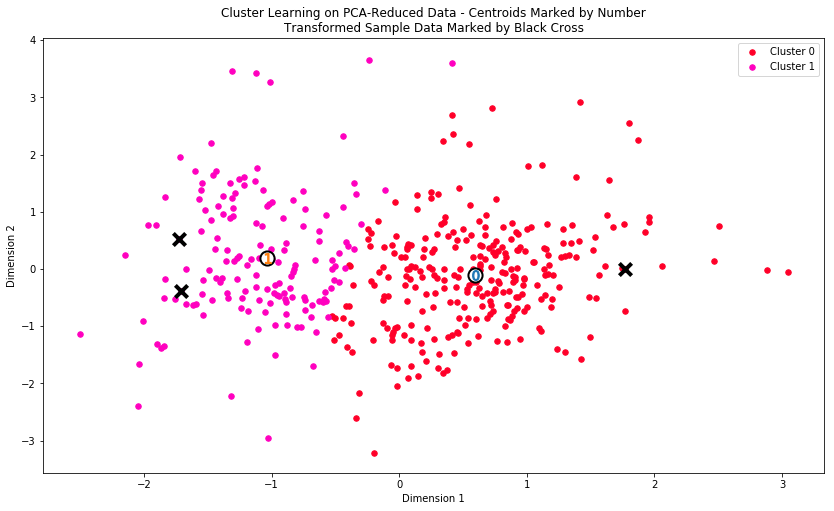

In [36]:
# Display the results of the clustering from implementation
n_clus=2
clusterer =GaussianMixture(n_components=n_clus,random_state=10).fit(reduced_data)

    # TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)    
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)
score = silhouette_score(reduced_data, preds, metric='mahalanobis')
print ("For n_clusters = {}. The average silhouette_score is : {}".format(n_clus, score))
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [37]:
# TODO: Inverse transform the centers
log_centers = pca_2.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8978.0,2105.0,2752.0,2081.0,350.0,731.0
Segment 1,3563.0,7806.0,12164.0,873.0,4659.0,962.0


Heatmap of samples


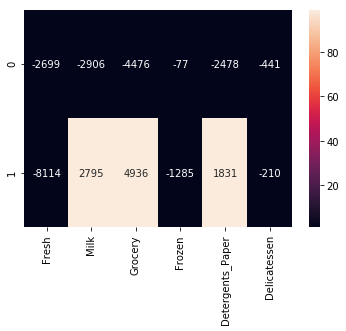

In [38]:
mean=pd.DataFrame(np.round(np.exp(pca_2.inverse_transform(reduced_data))), columns = data.keys()).mean()
mean=[round(m) for m in mean.tolist()]
temp=[]
for i in range(len(true_centers)):
    val=true_centers.iloc[i].tolist()
    temp+=[[val-mean for (val,mean) in zip(val,mean)]]
temp=pd.DataFrame(temp)
temp.columns=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']
print ("Heatmap of samples")
import seaborn as sns
sns.heatmap(temp, vmin=1, vmax=99, annot=True,fmt='.0f')


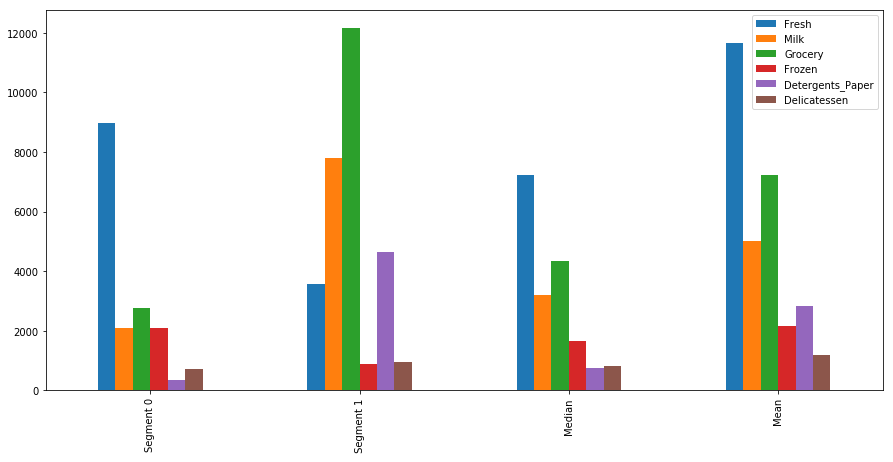

In [39]:
pca_data=pd.DataFrame(np.round(np.exp(pca_2.inverse_transform(reduced_data))), columns = data.keys())
samples_for_plot = true_centers.copy()
samples_for_plot.loc[2] =pca_data.median()
samples_for_plot.loc[3]=pca_data.mean()


labels = ['Segment 0',' Segment 1','Median','Mean']
samples_for_plot.plot(kind='bar',figsize=(15,7))
plt.xticks(range(4),labels)
plt.show()

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

>* **Segment 1**   

_(Left side-Pink colour)_

Here Milk, Grocerry and detergent paper value is higher then mean with Delicatessen almost equals to mean and greater then median. According to wikipedia, Delicatessen comes under Retail est. Generally Milk, Grocerry and detergent paperare buyed from **Retailers or Super market** .



>* **Segment 0**

_(Right side-Red colour)_

Here Fresh and Frozen are greater then median with Frozen almost equals to mean. According to http://restaurant-business-tips.blogspot.com/2012/07/frozen-food-in-restaurant-is-that.html frozen food is used by chain and fast cooked food restaurants for economy. But mostly Hotels sells fresh food for providing quality to customer. Hence this segment represent **Hotels or Restaurants**.

********************************************************************************

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [40]:
# Display the predictions 
#and The distance to each cluster centroid for justification
for i, pred in enumerate(sample_preds):
    print("\nSample point", i, "predicted to be in Cluster", pred)
    print('The distance between sample point {} and center of cluster {}:'.format(i, pred))
    print((samples.iloc[i] - true_centers.iloc[pred]))


Sample point 0 predicted to be in Cluster 1
The distance between sample point 0 and center of cluster 1:
Fresh                1404.0
Milk                13606.0
Grocery             16757.0
Frozen                925.0
Detergents_Paper     8924.0
Delicatessen          201.0
dtype: float64

Sample point 1 predicted to be in Cluster 1
The distance between sample point 1 and center of cluster 1:
Fresh              -1574.0
Milk                2884.0
Grocery             7296.0
Frozen              -640.0
Detergents_Paper    6918.0
Delicatessen        1191.0
dtype: float64

Sample point 2 predicted to be in Cluster 0
The distance between sample point 2 and center of cluster 0:
Fresh               2464.0
Milk               -1073.0
Grocery            -2170.0
Frozen              3309.0
Detergents_Paper    -276.0
Delicatessen        -484.0
dtype: float64


**Answer:**
This model correctly predicts the segments which I thought for these points.

>* **Sample 0:**

intuition - _SuperMarket or Retail Store_ or Grocery Store , predicted - Segment 1- _Retail Store_.
For Sample 0, the values for 'Grocery', 'Milk', and 'Detergents_Paper' are above average and resemble the Cluster 1 center in those categories.


>* **Sample 1:**

intuition - _Retail Store_ , predicted - Segment 1 - _Retail Store_.
"For Sample 1 is similar to sample 0, the values for 'Grocery', 'Milk', and 'Detergents_Paper' are above average and resemble the Cluster 1 center in those categories. 'Delicatessen' is near average for both sample and the predicted cluster, and so the predicted cluster seems to be consistent with the category spending of the sample."


>* **Sample 2:**

intuition - _Hotel_ , predicted - Segment 0 - _Hotel or Restaurants_.
For Sample 2, the values for Fresh and frozen are above average and resemble the Cluster 0 center in those categories. 
***************************


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

In [41]:
seg0={i: np.where(preds == i)[0] for i in range(clusterer.n_components)}[0]
seg1={i: np.where(preds == i)[0] for i in range(clusterer.n_components)}[1]

milk_mean=true_centers.iloc[0][1] #milk
total_more_milk_consumer_in_seg0=0;

deli_mean=true_centers.iloc[0][5] #deli
total_more_deli_consumer_in_seg0=0;

frozen_mean=true_centers.iloc[1][3] #frozen
total_more_frozen_consumer_in_seg1=0;

fresh_mean=true_centers.iloc[1][0] #fresh
total_more_fresh_consumer_in_seg1=0;


for i in range(len(seg0)):
    if (pca_data.iloc[seg0[i]][1]>milk_mean):
        total_more_milk_consumer_in_seg0=total_more_milk_consumer_in_seg0+1
        
for j in range(len(seg0)):
    if (pca_data.iloc[seg0[j]][5]>deli_mean):
        total_more_deli_consumer_in_seg0=total_more_deli_consumer_in_seg0+1
        
for k in range(len(seg1)):
    if (pca_data.iloc[seg1[k]][3]>frozen_mean):
        total_more_frozen_consumer_in_seg1=total_more_frozen_consumer_in_seg1+1
        
for l in range(len(seg1)):
    if (pca_data.iloc[seg1[l]][1]>fresh_mean):
        total_more_fresh_consumer_in_seg1=total_more_fresh_consumer_in_seg1+1 
        
print("total_more_milk_and_more_deli_consumer_in_seg0=" ,total_more_milk_consumer_in_seg0+total_more_deli_consumer_in_seg0)
print("total_more_frozen_consumer_in_seg1= ",total_more_frozen_consumer_in_seg1)

total_more_milk_and_more_deli_consumer_in_seg0= 273
total_more_frozen_consumer_in_seg1=  87


In [42]:
Image(url="abtest_result.png", height=500,width=500)

**Answer:**

On seeing both the segments, its seen that their are some feature that are important for our A/B test.

Segment 0 customers  item which need delivery 5 days a week as every customer want fresh milk everyday for tea and coffee and deli like new cheese and new eggs for everyday breakfast. If delivery is changed from 5days to 3 days then there will be negative effect for segment 1 customrs.

Segment 1 customers buy frozen foods, by name frozen means this can be preserve for several days so if delivery change from 5 days to 3 days then it effect positively on segment 1 customers.

lets take _A test as 3 days of week delivery and B test as 5 days of week delivery._

> **Segment 0 **

Applying A test on seg0 we found out that only 1.08% does not spend on milk and deli. much that tell us that 3 days delivery is ok for them but after applying B test its found out that majority of 273 people  i.e about 94.62% spend on milk and deli much that tell us that 5 days delivery is important for them.

=> Hence, B test wins here.

> **Segment 1 **

Applying A test on seg1 we found out that majority of 87 people i.e about 55.77% does spend much on frozen, that tell us that 3 days delivery is good for them but after applying B test its found out that  44.23% people does not spend much on frozen that was less then A test ,tell us that 5 days delivery is ok for them.

=> Hence, A test wins here.


 ### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

First train a supervised learning algorithm on the customer data, using annual spending on each product category as our features, and customer segment as our labels. Then we can use this trained classifier to predict the customer segment for each new customer, and assign each one a delivery frequency based on their assigned customer segment.

(OR)

First compute the squared distance between new client and centers of our already existed cluster and then assign them to closest cluster . Also,in the GMM model, we only perform these E-steps for the new data points to include them into the clustering.

****************************************

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

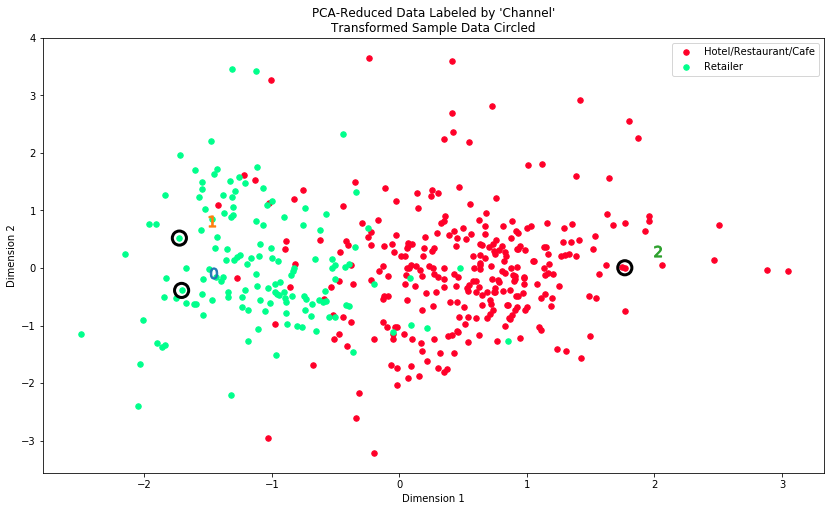

In [43]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

In [44]:
#find percentage of correctly classified customers
data = pd.read_csv("customers.csv")
data = data.drop(data.index[outliers]).reset_index(drop = True)
# might need to switch around the 0 and 1, based on your cluster seed
df = np.where(data['Channel'] == 2, 1, 0)
print("Percentage of correctly classified customers: {:.2%}".format(sum(df == preds)/float(len(preds))))

Percentage of correctly classified customers: 90.57%


**Answer:**

>*  How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 

The silhouette_score of my Gaussian mix. clustering algo. is 0.376171 and the number of components it has is 2 which match the channel data having 2 clusters.

We can also see how well based on Percentage of correctly classified customers as 90.57%.

>* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution?

Yes, customers towards the left hand side are more likely to be Retailers, whereas customers towards the right are likely to be restaurants/Hotels.

>* Would you consider these classifications as consistent with your previous definition of the customer segments?

The number of clusters that I chose are consistent with the underlying distribution.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [47]:
!!jupyter nbconvert *.ipynb

['[NbConvertApp] Converting notebook customer_segments.ipynb to html',
 '[NbConvertApp] Writing 2027551 bytes to customer_segments.html']